# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


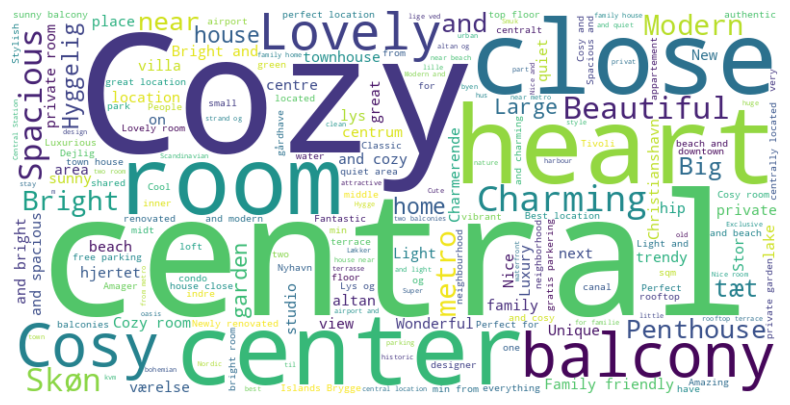

In [2]:
import pandas as pd
import sklearn as sk

data = pd.read_csv("listings.csv")

data_limited = data[
    [
        "id",
        "name",
        "host_id",
        "host_name",
        "neighbourhood_cleansed",
        "latitude",
        "longitude",
        "room_type",
        "price",
        "minimum_nights",
        "number_of_reviews",
        "last_review",
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
]

data_filtered = data_limited.loc[data_limited["number_of_reviews"] != 0]

data_filtered = data_filtered.dropna()
data_filtered.head()

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered[
    "neighbourhood_cleansed"
].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

data_filtered["price"] = (
    data_filtered["price"].replace("[\\$,]", "", regex=True).astype(float)
)

median_price = data_filtered["price"].median()

data_filtered["price_category"] = (data_filtered["price"] > median_price).astype(int)

display(data_filtered.head())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words = [
    "Østerbro",
    "Copenhagen",
    "København",
    "in",
    "bedroom",
    "bedrooms",
    "bed",
    "beds",
    "bath",
    "baths",
    "Frederiksberg",
    "V",
    "Ø",
    "SV",
    "S",
    "N",
    "K",
    "C",
    "W",
    "kbh",
    "Ballerup",
    "Hellerup",
    "Valby",
    "Vanløse",
    "Brønhøj",
    "Nørrebro",
    "Vesterbro",
    "CPH",
    "with",
    "to",
    "of",
    "a",
    "the",
    "på",
    "i",
    "med",
    "af",
    "at",
    "city",
    "by",
    "apartment",
    "appartment",
    "lejlighed",
    "flat",
    "m2",
    "apt",
]

text = " ".join(data_filtered["name"].astype(str))

wordcloud = WordCloud(
    stopwords=stop_words, background_color="white", width=800, height=400
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

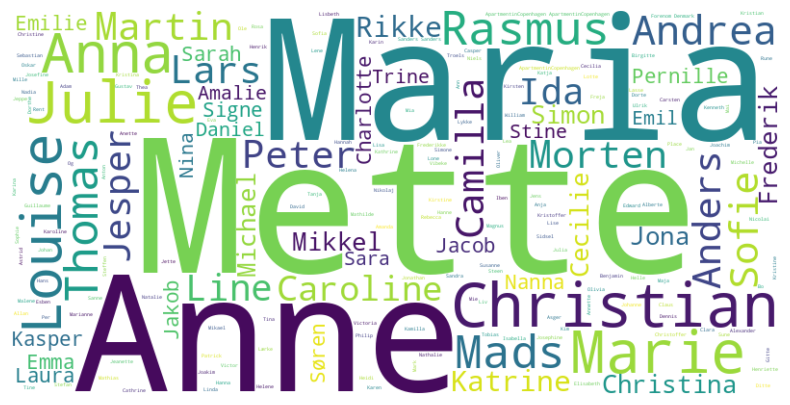

In [3]:
names = data_filtered["host_name"]

import re

pattern = re.compile(
    r"^[A-ZÆØÅ]\w*(?:\s[A-ZÆØÅ]\w*)*$"
)  # regex = starts with a capital letter
personal = names[names.str.match(pattern)]

names_string = " ".join(personal.astype(str))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    names_string
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

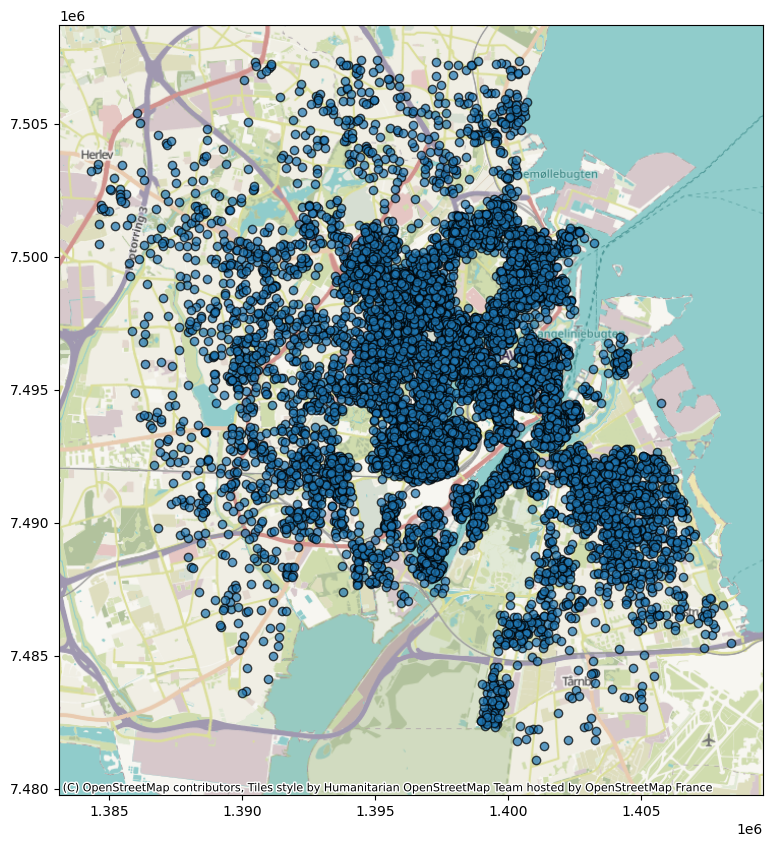

In [4]:
# data_filtered.head()

# import geopandas as gpd

# geo_data_filtered = gpd.GeoDataFrame(
#   data_filtered,
#   geometry=gpd.points_from_xy(data_filtered.longitude, data_filtered.latitude),
# )

# geo_data_filtered.plot()
# plt.show()

import geopandas as gpd
import contextily as cx

geo_data_filtered = gpd.GeoDataFrame(
    data_filtered,
    geometry=gpd.points_from_xy(data_filtered.longitude, data_filtered.latitude),
    crs="EPSG:4326",  # WGS84 - most GPS coordinates use this
)

geo_data_filtered = geo_data_filtered.to_crs(epsg=3857)

# Plot with real map background
ax = geo_data_filtered.plot(figsize=(10, 10), alpha=0.7, edgecolor="k")
cx.add_basemap(ax)  # You can change the provider


plt.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

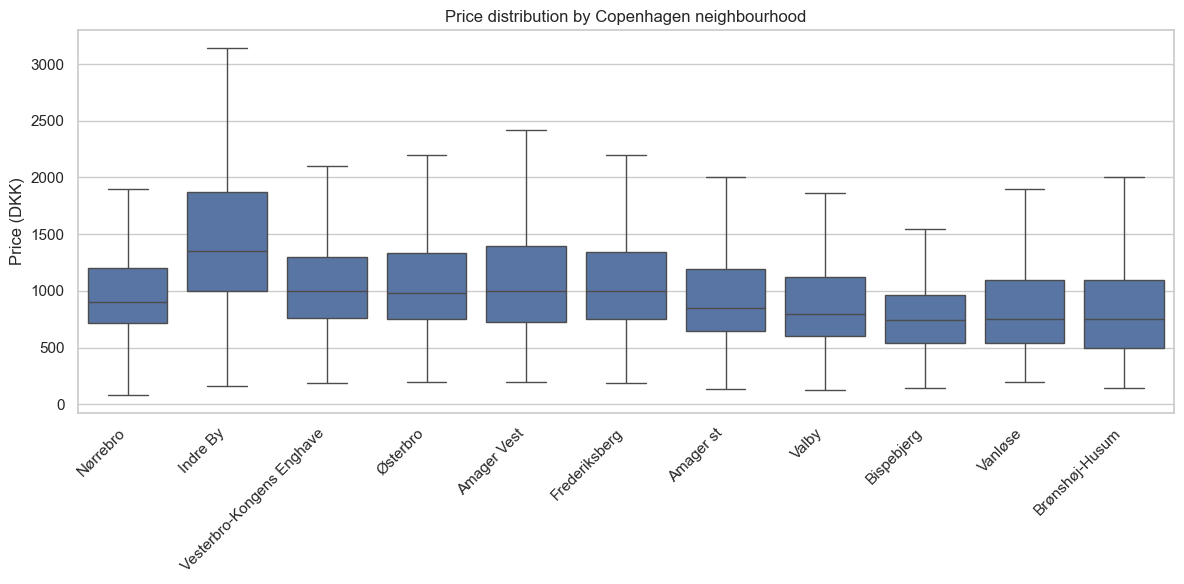

In [5]:
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(
    x="neighbourhood_cleansed",
    y="price",
    data=data_filtered,
    showfliers=False,
)


plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Price (DKK)")
plt.title("Price distribution by Copenhagen neighbourhood")

plt.tight_layout()
plt.show()

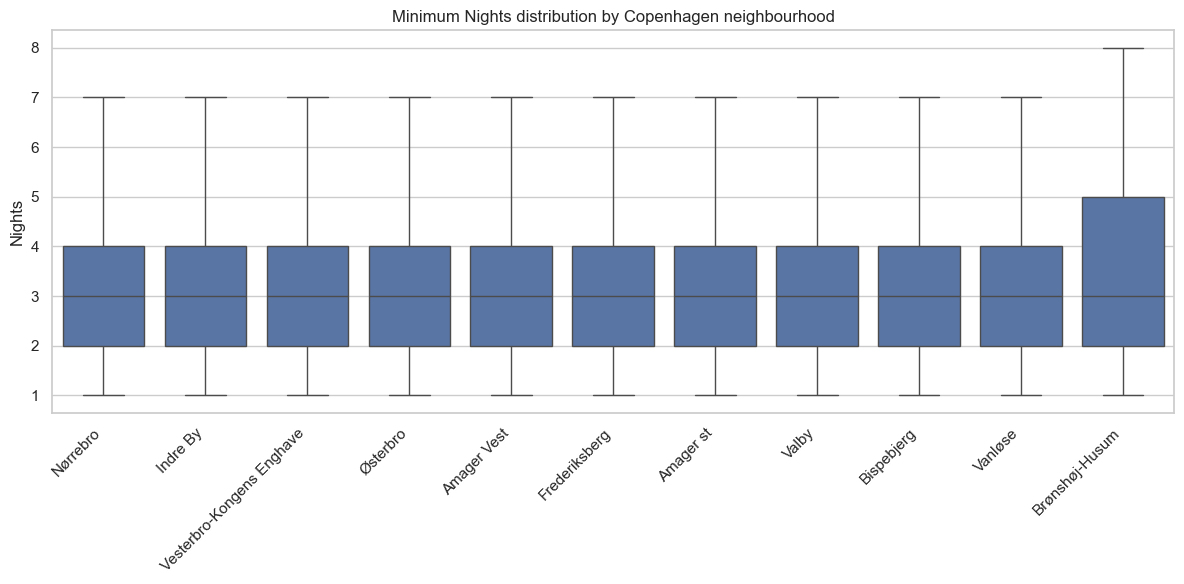

In [6]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="neighbourhood_cleansed", y="minimum_nights", data=data_filtered, showfliers=False
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Nights")
plt.title("Minimum Nights distribution by Copenhagen neighbourhood")

plt.tight_layout()
plt.show()

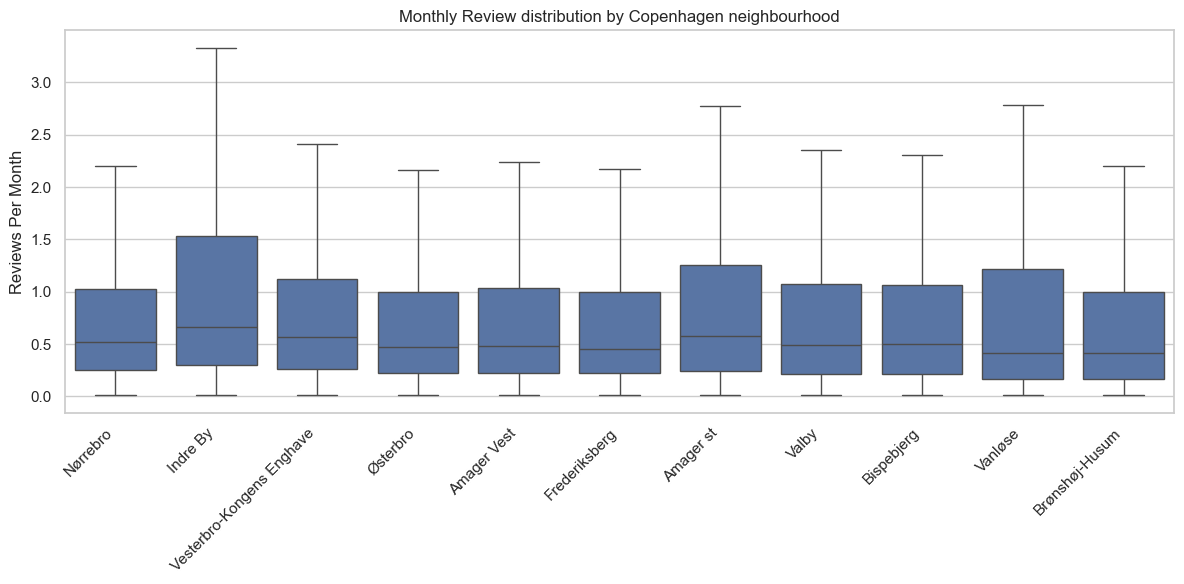

In [7]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="neighbourhood_cleansed",
    y="reviews_per_month",
    data=data_filtered,
    showfliers=False,
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Reviews Per Month")
plt.title("Monthly Review distribution by Copenhagen neighbourhood")

plt.tight_layout()
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [22]:
grouped = data_filtered.groupby(["neighbourhood_cleansed", "room_type"])

summary = grouped["price"].agg(
    count="count",
    mean="mean",
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    median="median",
    std="std",
    var="var",
    min="min",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    max="max",
)

summary

count         mean    mode  median  \
neighbourhood_cleansed    room_type                                             
Amager Vest               Entire home/apt    909  1234.226623  1000.0  1050.0   
                          Private room       148  1032.966216   500.0   500.0   
                          Shared room          2  1051.500000   972.0  1051.5   
Amager st                 Entire home/apt    791  1093.584071  1000.0   900.0   
                          Hotel room           3  1296.000000  1149.0  1201.0   
                          Private room       129   549.325581   450.0   471.0   
                          Shared room          1  2575.000000  2575.0  2575.0   
Bispebjerg                Entire home/apt    508   992.592520   700.0   800.0   
                          Private room        95   488.978947   300.0   400.0   
                          Shared room          1   198.000000   198.0   198.0   
Brønshøj-Husum            Entire home/apt    216  1014.995370  1400.0   900.0   
                          Private room        67   445.552239   500.0   400.0   
                          Shared room          2   211.500000   200.0   211.5   
Frederiksberg             Entire home/apt   1044  1292.472222  1000.0  1037.0   
                          Private room       133   621.706767   500.0   500.0   
Indre By                  Entire home/apt   1702  1642.387192  1200.0  1400.0   
                          Hotel room          10  1077.200000  1306.0  1306.0   
                          Private room       128   698.984375   450.0   582.0   
                          Shared room          4   292.000000   223.0   280.0   
Nørrebro                  Entire home/apt   1889  1047.742192  1000.0   950.0   
                          Private room       165   650.121212   500.0   500.0   
                          Shared room          3   324.666667   400.0   400.0   
Valby                     Entire home/apt    450  1017.968889   700.0   899.0   
                          Private room        89   498.157303   500.0   438.0   
Vanløse                   Entire home/apt    254   954.425197   700.0   826.5   
                          Private room        44   413.409091   300.0   337.5   
Vesterbro-Kongens Enghave Entire home/apt   1811  1181.435119  1000.0  1000.0   
                          Private room       221   574.366516   500.0   500.0   
                          Shared room          2   330.500000   250.0   330.5   
Østerbro                  Entire home/apt   1174  1248.551107  1000.0  1000.0   
                          Private room       130   605.461538   400.0   500.0   
                          Shared room          1   469.000000   469.0   469.0   

                                                   std           var     min  \
neighbourhood_cleansed    room_type                                            
Amager Vest               Entire home/apt   832.696891  6.933841e+05   250.0   
                          Private room     5299.018095  2.807959e+07   200.0   
                          Shared room       112.429978  1.264050e+04   972.0   
Amager st                 Entire home/apt   721.982284  5.212584e+05   240.0   
                          Hotel room        211.184753  4.459900e+04  1149.0   
                          Private room      293.995992  8.643364e+04   135.0   
                          Shared room              NaN           NaN  2575.0   
Bispebjerg                Entire home/apt  1981.580545  3.926661e+06   235.0   
                          Private room      353.674089  1.250854e+05   143.0   
                          Shared room              NaN           NaN   198.0   
Brønshøj-Husum            Entire home/apt   555.669548  3.087686e+05   250.0   
                          Private room      201.631624  4.065531e+04   145.0   
                          Shared room        16.263456  2.645000e+02   200.0   
Frederiksberg             Entire home/apt  1958.802772  3.836908e+06   300.0   
        

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder_neighbourhood = LabelEncoder()
label_encoder_room_type = LabelEncoder()


knn_data = data_filtered[
    [
        "latitude",
        "longitude",
        "minimum_nights",
        "neighbourhood_cleansed",
        "room_type",
        "price",
        "number_of_reviews",
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_location",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_value",
        "reviews_per_month",
        "calculated_host_listings_count",
        "availability_365",
    ]
].copy()

knn_data.loc[:, "neighbourhood_encoded"] = label_encoder_neighbourhood.fit_transform(
    knn_data["neighbourhood_cleansed"]
)
knn_data.loc[:, "room_type_encoded"] = label_encoder_room_type.fit_transform(
    knn_data["room_type"]
)

knn_data = knn_data.drop(
    [
        "neighbourhood_cleansed",
        "room_type",
        "price",  # initial not encoded columns dropped and price dropped
        "neighbourhood_encoded",  # worse when added
        # 'room_type_encoded', best performing metric!
        # "latitude", # better, seems like lat,long makes more difference than neighbourhood
        # "longitude", # better
        "minimum_nights",  # almost no difference
        # "number_of_reviews", # no difference for all reviews
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_location",
        "review_scores_checkin",
        # "review_scores_communication"  ,
        "review_scores_value",
        "reviews_per_month",
        # "calculated_host_listings_count" ,
        # "availability_365, - this is way better
    ],
    axis=1,
)

knn_data = pd.concat([knn_data, data_filtered["price_category"]], axis=1)

# Prepare data for modeling
X = knn_data.iloc[:, :-1]  # All columns except the last one
Y = knn_data.iloc[:, -1]  # The last column (price_category)
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=42, test_size=0.2
)
# Standard Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=50, metric="manhattan")
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)
print("Accuracy score with train data: {}".format(classifier.score(X_train, Y_train)))
print("Accuracy score with test data: {}".format(classifier.score(X_test, Y_test)))

Accuracy score with train data: 0.7102061855670103
Accuracy score with test data: 0.6995053586150041


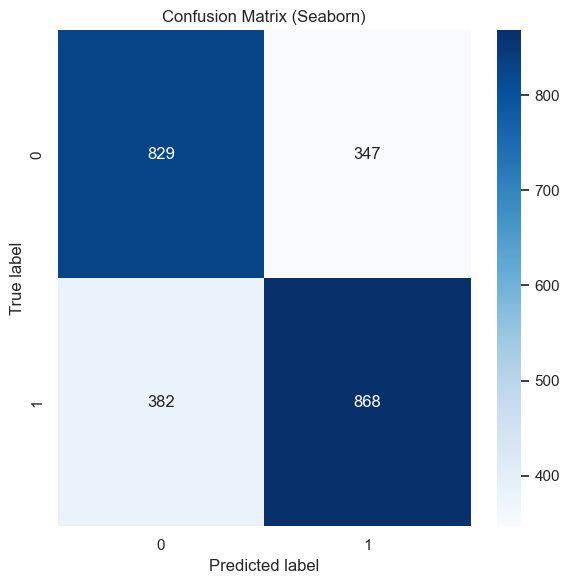

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, prediction)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=classifier.classes_,
    yticklabels=classifier.classes_,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Seaborn)")
plt.tight_layout()
plt.show()